In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 

In [ ]:
Datos = pd.read_csv('/content/drive/MyDrive/allUsers.lcl.csv', index_col=0)
Datos.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78096 entries, 0 to 5
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User    78096 non-null  int64  
 1   X0      78096 non-null  float64
 2   Y0      78096 non-null  float64
 3   Z0      78096 non-null  float64
 4   X1      78096 non-null  float64
 5   Y1      78096 non-null  float64
 6   Z1      78096 non-null  float64
 7   X2      78096 non-null  float64
 8   Y2      78096 non-null  float64
 9   Z2      78096 non-null  float64
 10  X3      78096 non-null  object 
 11  Y3      78096 non-null  object 
 12  Z3      78096 non-null  object 
 13  X4      78096 non-null  object 
 14  Y4      78096 non-null  object 
 15  Z4      78096 non-null  object 
 16  X5      78096 non-null  object 
 17  Y5      78096 non-null  object 
 18  Z5      78096 non-null  object 
 19  X6      78096 non-null  object 
 20  Y6      78096 non-null  object 
 21  Z6      78096 non-null  object 
 22  X7

In [ ]:
Datos_1= Datos.replace(["?"], "NaN")

print(Datos_1)


       User         X0          Y0         Z0         X1          Y1  \
Class                                                                  
0         0   0.000000    0.000000   0.000000   0.000000    0.000000   
1         0  54.263880   71.466776 -64.807709  76.895635   42.462500   
1         0  56.527558   72.266609 -61.935252  39.135978   82.538530   
1         0  55.849928   72.469064 -62.562788  37.988804   82.631347   
1         0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...     ...        ...         ...        ...        ...         ...   
5        14  54.251127  129.177414 -44.252511  27.720784  107.810661   
5        14  54.334883  129.253842 -44.016320  27.767911  107.914808   
5        14  54.151540  129.269502 -44.173273  27.725978  108.034006   
5        14  27.915311  108.007390  10.814957  -0.910435  122.464093   
5        14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2         Z2  ...        

In [ ]:
Datos_1['X3'] = Datos_1['X3'].astype(float, errors = 'raise')


In [ ]:
Datos_2 = Datos_1.astype(float, errors = 'raise')

In [ ]:
missing_perc = Datos_2.isnull().mean() * 100

print(missing_perc)

User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.883528
Y3       0.883528
Z3       0.883528
X4       3.995083
Y4       3.995083
Z4       3.995083
X5      16.675630
Y5      16.675630
Z5      16.675630
X6      33.097726
Y6      33.097726
Z6      33.097726
X7      50.133169
Y7      50.133169
Z7      50.133169
X8      60.863553
Y8      60.863553
Z8      60.863553
X9      69.309568
Y9      69.309568
Z9      69.309568
X10     81.109148
Y10     81.109148
Z10     81.109148
X11     99.959025
Y11     99.959025
Z11     99.959025
dtype: float64


In [ ]:
Datos_3 = Datos_2.dropna(thresh=len(Datos_2) * 0.5, axis=1)
Datos_3.isnull().any()

User    False
X0      False
Y0      False
Z0      False
X1      False
Y1      False
Z1      False
X2      False
Y2      False
Z2      False
X3       True
Y3       True
Z3       True
X4       True
Y4       True
Z4       True
X5       True
Y5       True
Z5       True
X6       True
Y6       True
Z6       True
dtype: bool

<Axes: title={'center': 'Mapa de calor'}>

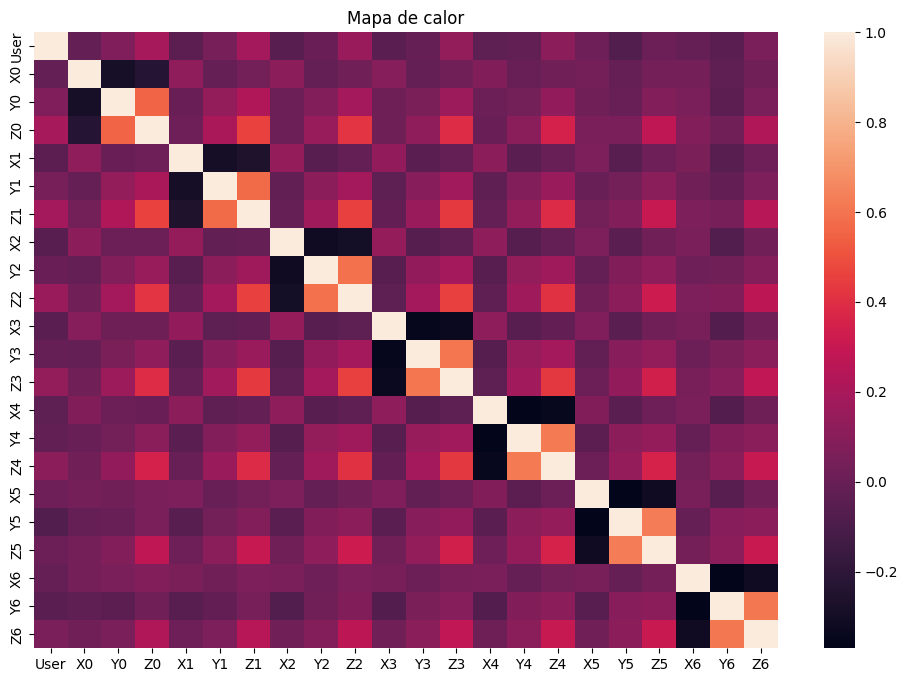

In [ ]:
m_corr = Datos_3.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Mapa de calor')
sns.heatmap(m_corr) 

**EXPLORACIÓN INICIAL**

In [ ]:
# Estudiamos la variable.
Datos_3["X3"]

Class
0     0.000000
1    85.232264
1    87.450873
1    86.835388
1    61.596157
       ...    
5    -1.901940
5   -22.743924
5   -30.225675
5    26.715915
5    53.965333
Name: X3, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['X3'].isnull().sum()

690

In [ ]:
# Estudiamos la variable.
Datos_3["Y3"]

Class
0      0.000000
1     67.749220
1     68.400808
1     68.907925
1     11.250648
        ...    
5     98.056881
5    104.726272
5     77.688911
5    135.523929
5    129.602374
Name: Y3, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Y3'].isnull().sum()

690

In [ ]:
# Estudiamos la variable.
Datos_3["Z3"]

Class
0     0.000000
1   -73.684130
1   -70.703991
1   -71.138344
1   -68.956425
       ...    
5     4.075018
5   -53.007244
5   -17.354844
5   -34.675774
5   -43.679664
Name: Z3, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Z3'].isnull().sum()

690

In [ ]:
# Estudiamos la variable.
Datos_3["X4"]

Class
0     0.000000
1    59.188576
1    61.587452
1    61.686427
1    77.387225
       ...    
5    26.030878
5    26.446943
5    26.506640
5   -22.329495
5    -1.558846
Name: X4, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['X4'].isnull().sum()

3120

In [ ]:
# Estudiamos la variable.
Datos_3["Y4"]

Class
0      0.000000
1     10.678936
1     11.779919
1     11.793440
1     42.717833
        ...    
5    136.368236
5    135.823494
5    135.605903
5    104.026431
5     98.017201
Name: Y4, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Y4'].isnull().sum()

3120

In [ ]:
# Estudiamos la variable.
Datos_3["Z4"]

Class
0     0.000000
1   -71.297781
1   -68.827418
1   -68.889316
1   -72.015146
       ...    
5   -32.792393
5   -33.851425
5   -34.441463
5   -54.334623
5     3.421814
Name: Z4, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Z4'].isnull().sum()

3120

In [ ]:
# Estudiamos la variable.
Datos_3["X5"]

Class
0     0.000000
1          NaN
1          NaN
1          NaN
1          NaN
       ...    
5    77.293710
5    -1.090674
5    61.475331
5    61.639386
5    26.586910
Name: X5, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['X5'].isnull().sum()

13023

In [ ]:
# Estudiamos la variable.
Datos_3["Y5"]

Class
0      0.000000
1           NaN
1           NaN
1           NaN
1           NaN
        ...    
5     34.070857
5    122.724914
5    101.321181
5    101.224662
5    135.762922
Name: Y5, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Y5'].isnull().sum()

13023

In [ ]:
# Estudiamos la variable.
Datos_3["Z5"]

Class
0     0.000000
1          NaN
1          NaN
1          NaN
1          NaN
       ...    
5   -43.263790
5   -46.558373
5    -6.616988
5    -6.840942
5   -34.445944
Name: Z5, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Z5'].isnull().sum()

13023

In [ ]:
# Estudiamos la variable.
Datos_3["X6"]

Class
0     0.000000
1          NaN
1          NaN
1          NaN
1          NaN
       ...    
5   -30.282201
5    -1.958502
5    -1.125738
5    54.009962
5   -22.316029
Name: X6, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['X6'].isnull().sum()

25848

In [ ]:
# Estudiamos la variable.
Datos_3["Y6"]

Class
0      0.000000
1           NaN
1           NaN
1           NaN
1           NaN
        ...    
5     77.622306
5     98.288931
5    122.614027
5    129.477879
5    104.124677
Name: Y6, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Y6'].isnull().sum()

25848

In [ ]:
# Estudiamos la variable.
Datos_3["Z6"]

Class
0     0.000000
1          NaN
1          NaN
1          NaN
1          NaN
       ...    
5   -17.150292
5     4.248334
5   -46.796054
5   -43.967820
5   -54.344079
Name: Z6, Length: 78096, dtype: float64

In [ ]:
# Número de observaciones faltantes.
Datos_3['Z6'].isnull().sum()

25848

**RELLENAR POR CORRELACIÓN**

Rellenar los valores de X3 por correlacion

In [ ]:
# DATOS_Y es el dataframe con las modificaciones que haremos  continuación.
DATOS_Y = Datos_3.copy()

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

def imputar_valores_nulos_por_correlacion(column):
  imputer = KNNImputer(n_neighbors=2)

  null_indices = column.isnull()
  cor_c = m_corr[column.name].sort_values(ascending=False).index.tolist()
  impute_values = imputer.fit_transform(DATOS_Y[cor_c])
  DATOS_Y.loc[null_indices, column.name] = impute_values[null_indices, cor_c.index(column.name)]


    

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['X3'])
print(DATOS_Y['X3'].isnull().sum())

ValueError: ignored

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Y3'])
print(DATOS_Y['Y3'].isnull().sum())

KeyboardInterrupt: ignored

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Z3'])
print(DATOS_Y['Z3'].isnull().sum())

0


In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['X4'],)
print(DATOS_Y['X4'].isnull().sum())

KeyboardInterrupt: ignored

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Y4'])
print(DATOS_Y['Y4'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Z4'])
print(DATOS_Y['Z4'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['X5'])
print(DATOS_Y['X5'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Y5'])
print(DATOS_Y['Y5'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Z5'])
print(DATOS_Y['Z5'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['X6'])
print(DATOS_Y['X6'].isnull().sum())

0


In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Y6'])
print(DATOS_Y['Y6'].isnull().sum())

In [ ]:
imputar_valores_nulos_por_correlacion(DATOS_Y['Z6'])
print(DATOS_Y['Z6'].isnull().sum())